In [1]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
import PIL
from PIL import Image
#from google.colab.patches import cv2_imshow
import math

In [144]:
class bearings_classifier():
    def __init__(self):
        src = input('Enter source image path')
        dst = input('Enter destination image path')
        self.path_src = src
        self.path_dst = dst
        self.bearing_img_width = 500
        self.pin_img_width = 350
        if os.path.isdir(src) and os.path.isdir(dst):
            self.path_src = src
            self.path_dst = dst
            self.roller_pin_count()    
        else:
            print('Enter valid path')


    # width = 500 for Outer circle detection
    # width = 350 for inner circle detection 
    def image_preprocessing(self, width, img):
        mywidth = width
        wpercent = (mywidth/float(img.shape[1]))
        hsize = int((float(img.shape[0])*float(wpercent)))
        dim = (mywidth,hsize)
        img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
        return img

    # considering single bearing image has been inserted
    def bearing_detection(self, img):
        cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        radii = np.arange(10,310,10)
        mask = np.zeros((img.shape[0],img.shape[1]), np.uint8)

        for idx in range(len(radii)-1):
            minRadius,maxRadius = radii[idx]+1, radii[idx+1]
            circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5,
                                param1=25,param2=75,minRadius=minRadius,maxRadius=maxRadius)
                                
            if circles is None:
                continue
            
            else:
                circles = np.uint16(np.around(circles))
                for i in circles[0,:]:
                    i[2]=i[2]+4
                    cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)
                masked_data = cv2.bitwise_and(img, img, mask=mask)
                _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
                contours =   cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
                x,y,w,h = cv2.boundingRect(contours[0])
                crop = masked_data[y:y+h,x:x+w]
                return len(circles), crop

        return circles, None

    def roller_pin_count(self):    
        img = cv2.imread(self.path_src,0)
        img = self.bearing_detection(self.image_preprocessing(self.bearing_img_width, img))[1]
        img = self.image_preprocessing(self.pin_img_width, img)
        cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        img = cv2.GaussianBlur(img, (5,5), sigmaX = -1, sigmaY = -1)
        cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                                    param1= 100,param2=30,minRadius=10,maxRadius=25)

        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
            cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

        fig = plt.figure(figsize=(10,10))  
        if len(circles[0,:]) == 16:
            fig.suptitle('Good', fontsize = 18)
        else:
            fig.suptitle('Bad', fontsize = 18)
        plt.imshow(cimg)
        #plt.xtitle(f'{len(circles)}')
        plt.axis('off')
        print(len(circles[0,:]))
        plt.show()
        #plt.imsave(self.path_dst + '/' + self.path_src + '_Result', cimg)

16


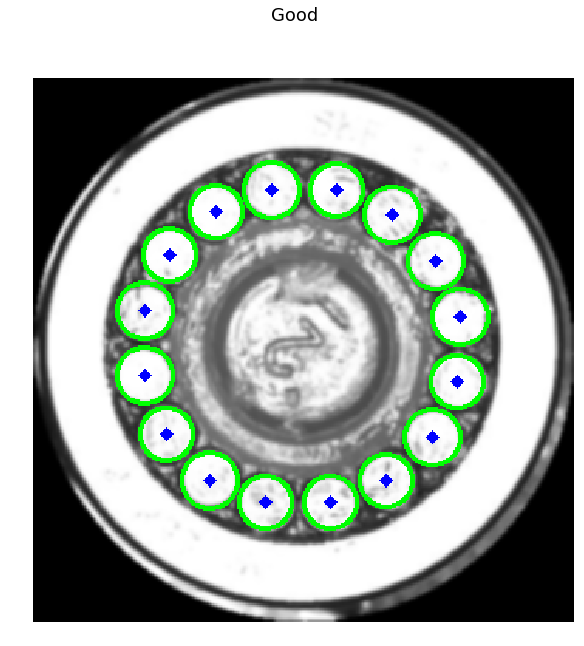

In [152]:
br = bearings_classifier()

In [127]:
path = 'C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad/3.png' 


In [129]:
a = cv2.imread(path)

In [131]:
print(a)

None
